In [47]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   -------- ------------------------------- 61.4/301.4 kB 1.7 MB/s eta 0:00:01
   --------------------- ------------------ 163.8/301.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00


In [73]:
import pandas as pd
import seaborn as sns 
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
df = pd.read_csv('Review.csv')

In [8]:
df.head()

,Unnamed: 0,rating,comment
0,0,5,Lovely
1,1,5,Value for money
2,2,4,Awesome product 👍
3,3,4,Best
4,4,5,Excellent


In [9]:
df=df.drop(df.columns[0], axis=1)
df.head()

,rating,comment
0,5,Lovely
1,5,Value for money
2,4,Awesome product 👍
3,4,Best
4,5,Excellent


In [10]:
df['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

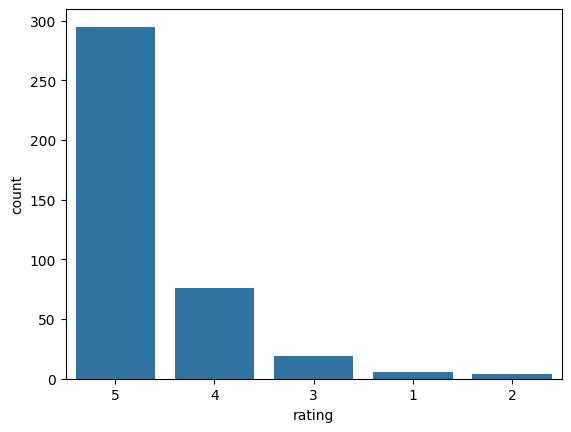

In [11]:
sns.countplot(data=df, 
              x='rating', 
              order=df.rating.value_counts().index)

In [12]:
df['rating'].count()

400

# Sentiment
- Positive Sentiment is 1
- Negative Sentiment is 0
- Any rating less than or equal to 4 is considered to be negative and only with rating of 5 is positive

In [13]:
pos_neg = [] 
for i in range(len(df['rating'])): 
    if df['rating'][i] == 5: 
        pos_neg.append(1) 
    else: 
        pos_neg.append(0) 
  
df['label'] = pos_neg 

In [14]:
df.head()

,rating,comment,label
0,5,Lovely,1
1,5,Value for money,1
2,4,Awesome product 👍,0
3,4,Best,0
4,5,Excellent,1


# Removing Punctuation and making the letter lower of comment column

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\devas\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
def processing(text):
    processed_data=[]
    for i in text:
        i = re.sub(r'[^,\w\s]','', i)
        processed_data.append(' '.join(k.lower() for k in nltk.word_tokenize(i) if k.lower() not in stopwords.words('english')))

    return processed_data

In [33]:
processed_review = processing(df['comment'].values)
df['Review'] = processed_review
df.head()

,rating,comment,label,Review
0,5,Lovely,1,lovely
1,5,Value for money,1,value money
2,4,Awesome product 👍,0,awesome product
3,4,Best,0,best
4,5,Excellent,1,excellent


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rating   400 non-null    int64 
 1   comment  400 non-null    object
 2   label    400 non-null    int64 
 3   Review   400 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.6+ KB


In [41]:
df['label'].value_counts()

label
1    295
0    105
Name: count, dtype: int64

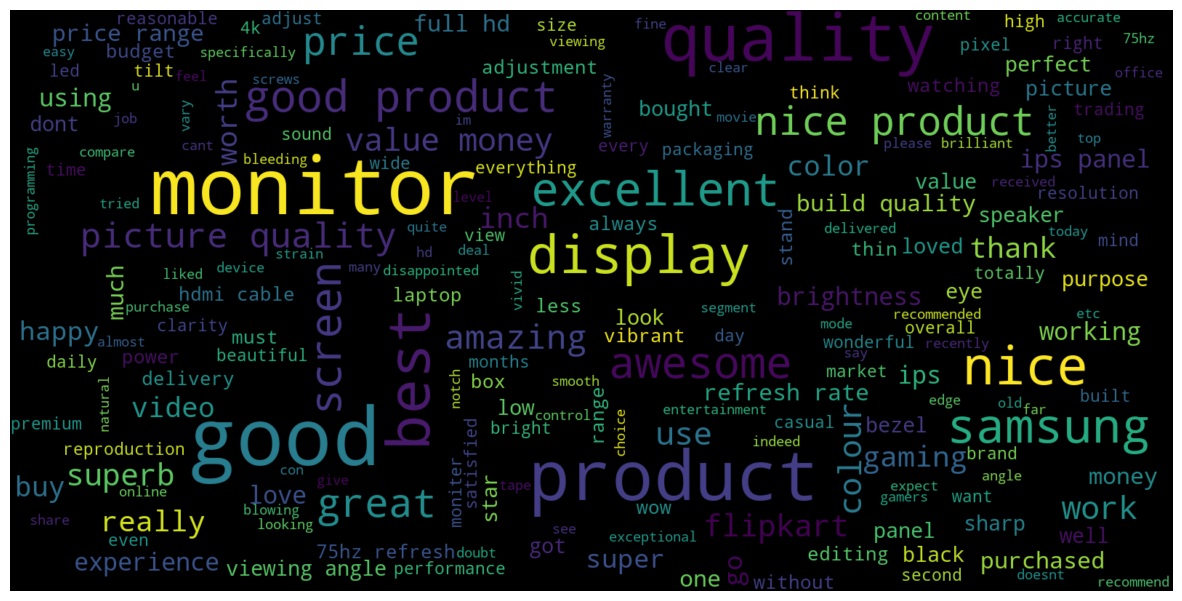

In [50]:
consolidated_1 = ' '.join( 
    word for word in df['Review'][df['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated_1), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

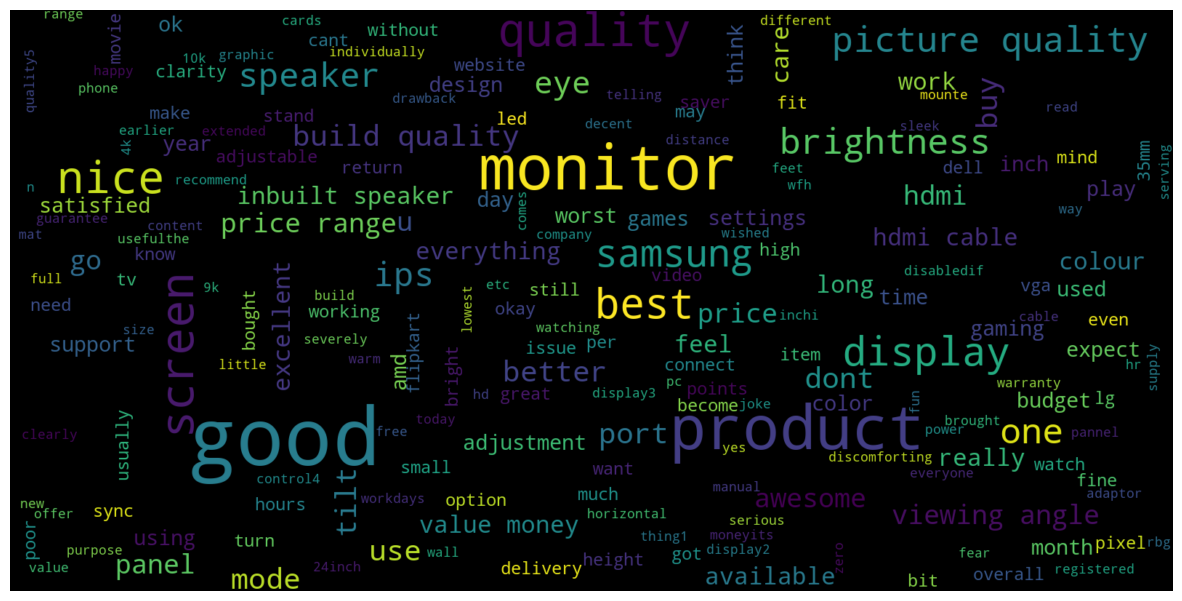

In [52]:
consolidated_0 = ' '.join( 
    word for word in df['Review'][df['label'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated_0), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [59]:
# converting in vectors
cv = TfidfVectorizer(max_features=2500) 
X = cv.fit_transform(df['Review'] ).toarray()
X.shape

(400, 897)

# Model training, Evaluation, and Prediction

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], 
                                                    test_size=0.33, 
                                                    stratify=df['label'], 
                                                    random_state = 42)

In [72]:
model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  
#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9328358208955224


# Confusion Matrix

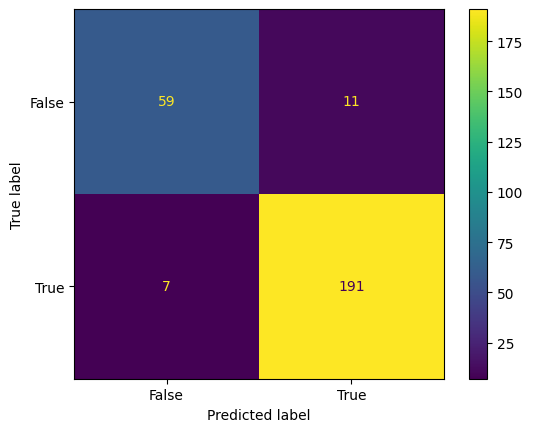

In [74]:
cm = confusion_matrix(y_train,pred) 
  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,  
                                            display_labels = [False, True]) 
  
cm_display.plot() 
plt.show()